In [73]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [74]:
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [75]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [76]:
target_classes = list(reversed(data.target_names))

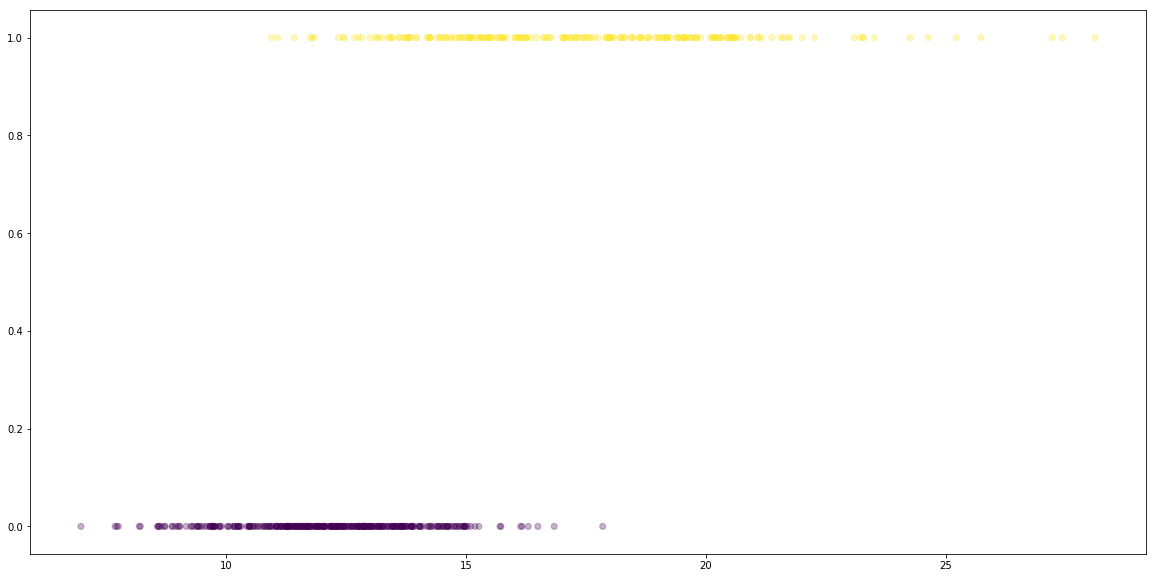

In [77]:
y = data.target == 0 # if zero then we detect malignant tumor.
X = data.data[:, [0]]

X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, random_state=667, test_size=0.25)

plt.scatter(X, y, alpha=0.3, c=y)
plt.show()

You may need to install `graphviz` software. In Ubuntu you can do with

```
sudo apt install graphviz
```

In [78]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, f1_score

clf = DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X_train, y_train)
y_dev_hat = clf.predict(X_dev)
print("Accuracy :", accuracy_score(y_dev, y_dev_hat))
print("f1-score: ", f1_score(y_dev, y_dev_hat))

Accuracy : 0.868421052631579
f1-score:  0.7692307692307692


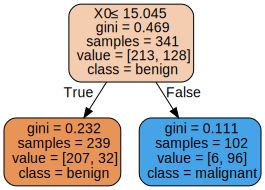

In [79]:
dot_data = export_graphviz(clf, out_file=None, 
                     class_names=target_classes,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [80]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_dev_hat = clf.predict(X_dev)
print("Accuracy :", accuracy_score(y_dev, y_dev_hat))
print("f1-score: ", f1_score(y_dev, y_dev_hat))

Accuracy : 0.8596491228070176
f1-score:  0.7499999999999999


In [89]:
X = data.data

X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, random_state=667, test_size=0.25)

clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)
y_dev_hat = clf.predict(X_dev)

print("Accuracy :", accuracy_score(y_dev, y_dev_hat))
print("f1-score: ", f1_score(y_dev, y_dev_hat))

Accuracy : 0.9385964912280702
f1-score:  0.9113924050632912


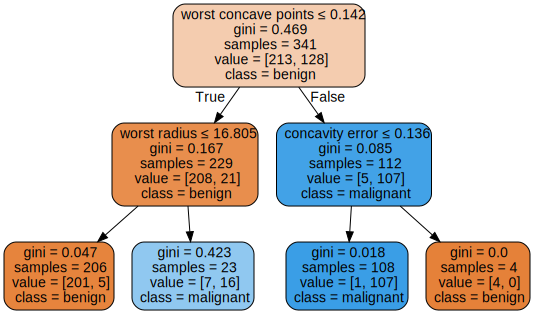

In [90]:
dot_data = export_graphviz(
    clf, out_file=None, 
    feature_names=data.feature_names,
    class_names=target_classes,  
    filled=True, rounded=True,  
    special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


In [91]:
scores = []
for depth in range(1, 21):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_dev_hat = clf.predict(X_dev)
    accuaracy = accuracy_score(y_dev, y_dev_hat)
    f1 = f1_score(y_dev, y_dev_hat)
    scores.append((depth, accuaracy, f1))
scores

[(1, 0.9385964912280702, 0.9066666666666667),
 (2, 0.9385964912280702, 0.9113924050632912),
 (3, 0.9473684210526315, 0.9210526315789473),
 (4, 0.9210526315789473, 0.88),
 (5, 0.9122807017543859, 0.868421052631579),
 (6, 0.9473684210526315, 0.918918918918919),
 (7, 0.9210526315789473, 0.8831168831168831),
 (8, 0.9122807017543859, 0.868421052631579),
 (9, 0.8947368421052632, 0.8461538461538461),
 (10, 0.9122807017543859, 0.868421052631579),
 (11, 0.9210526315789473, 0.8767123287671234),
 (12, 0.9210526315789473, 0.88),
 (13, 0.9298245614035088, 0.8947368421052632),
 (14, 0.9035087719298246, 0.8571428571428572),
 (15, 0.8947368421052632, 0.8461538461538461),
 (16, 0.8947368421052632, 0.8461538461538461),
 (17, 0.9298245614035088, 0.8947368421052632),
 (18, 0.9122807017543859, 0.8717948717948718),
 (19, 0.9210526315789473, 0.8767123287671234),
 (20, 0.9122807017543859, 0.8648648648648649)]

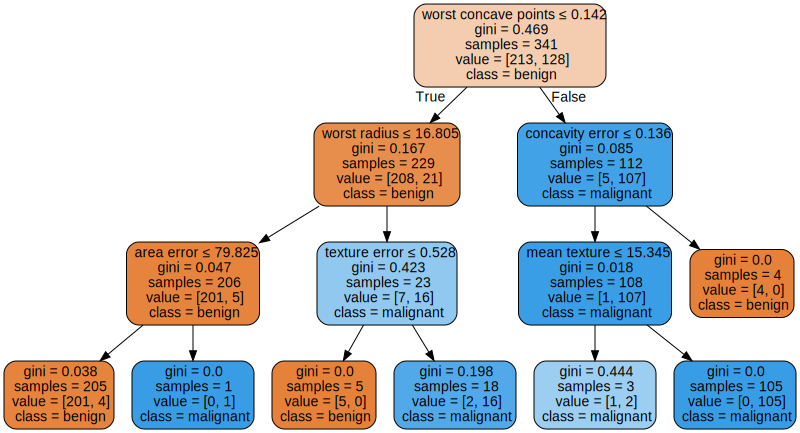

In [92]:
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
y_dev_hat = clf.predict(X_dev)
dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=data.feature_names,
                     class_names=target_classes,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [94]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_dev_hat = clf.predict(X_dev)
print("Accuracy :", accuracy_score(y_dev, y_dev_hat))
print("f1-score: ", f1_score(y_dev, y_dev_hat))

Accuracy : 0.9736842105263158
f1-score:  0.958904109589041
